In [36]:
import twstock
import pandas as pd
# 導入twstock及pandas模組，pandas模組縮寫為pd

target_stock = '0050'  #股票代號變數
stock = twstock.Stock(target_stock)  #告訴twstock我們要查詢的股票
target_price = stock.fetch_from(2005, 5)  #取用2020/05至今每天的交易資料

name_attribute = [
    'Date', 'Capacity', 'Turnover', 'Open', 'High', 'Low', 'Close', 'Change',
    'Transcation'
]  #幫收集到的資料設定表頭

df = pd.DataFrame(columns=name_attribute, data=target_price)
#將twstock抓到的清單轉成Data Frame格式的資料表
print(df)

import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()




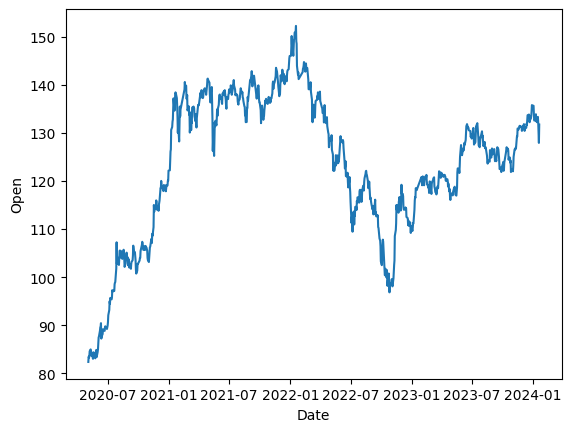

In [51]:
import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.show()

In [42]:
from datetime import datetime
#國歷轉西元
def taiwan_to_ad(date_str):
    date_str = date_str.replace('年','-')
    date_str = date_str.replace('月','-')
    date_str = date_str.replace('日','')

    sp = date_str.split('-')
    result  = str(int(sp[0])+1911) + '-' + sp[1] + '-' + sp[2]
    return result

# 舉例：轉換 '94年01月11日' 為 'xxxx-xx-xx' 格式
taiwan_date_str = '94年01月11日'
formatted_date = taiwan_to_ad(taiwan_date_str)
print(f"台灣國歷 {taiwan_date_str} 對應的西元日期為 {formatted_date}")

台灣國歷 94年01月11日 對應的西元日期為 2005-01-11


In [47]:
def get_twse_dividend_history(start_date: str, end_date: str):
    url = f"https://www.twse.com.tw/exchangeReport/TWT49U?response=html&strDate={start_date}&endDate={end_date}"
    dividend_history = pd.read_html(url)

    return dividend_history[0]

data = get_twse_dividend_history("20050101","20231231")
print(data.keys)

df = pd.DataFrame(columns=['資料日期','股票代號','除權息前收盤價','除權息參考價','權值+息值','權/息','減除股利參考價'], data=data)
df = df[df['股票代號'] == '0050']
df['資料日期'] = df['資料日期'].apply(taiwan_to_ad)
df

<bound method NDFrame.keys of              資料日期   股票代號     股票名稱  除權息前收盤價  除權息參考價     權值+息值 權/息    漲停價格  \
0       94年01月11日   6280       崇貿    33.00   27.48  5.520000   權   29.40   
1       94年01月18日   2023       燁輝    23.30   23.19  0.110000   權   24.90   
2       94年01月24日   2888      新光金    31.00   30.54  0.460000   權   33.10   
3       94年01月25日   2825      中央保    11.80   11.13  0.670000   權   11.90   
4       94年02月14日   2388       威盛    16.00   15.22  0.780000   權   16.20   
...           ...    ...      ...      ...     ...       ...  ..     ...   
14125  112年12月21日  00921  兆豐龍頭等權重    18.17   17.97  0.200000   息   19.76   
14126  112年12月21日   2753     八方雲集   171.00  169.00  1.995488   息  185.50   
14127  112年12月21日   8070      長華*    34.30   33.75  0.540420   息   37.10   
14128  112年12月26日   2028       威致    27.45   26.94  0.500492   息   29.60   
14129  112年12月26日   4912  聯德控股-KY    81.40   80.57  0.828000   息   88.60   

         跌停價格  開盤競價基準  減除股利參考價   詳細資料 最近一次申報資料 季別/日期  最近一

,資料日期,股票代號,除權息前收盤價,除權息參考價,權值+息值,權/息,減除股利參考價
21,2005-05-19,0050,46.69,44.84,1.85,息,44.84
1068,2006-10-26,0050,57.40,53.40,4.00,息,53.40
1604,2007-10-24,0050,70.60,68.10,2.50,息,68.10
2219,2008-10-24,0050,35.51,33.51,2.00,息,33.51
2712,2009-10-23,0050,53.70,52.70,1.00,息,52.70
3340,2010-10-25,0050,57.10,54.90,2.20,息,54.90
4068,2011-10-26,0050,53.60,51.65,1.95,息,51.65
4738,2012-10-24,0050,52.90,51.05,1.85,息,51.05
5424,2013-10-24,0050,58.70,57.35,1.35,息,57.35
6168,2014-10-24,0050,65.05,63.50,1.55,息,63.50


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26009 (\N{CJK UNIFIED IDEOGRAPH-6599}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38500 (\

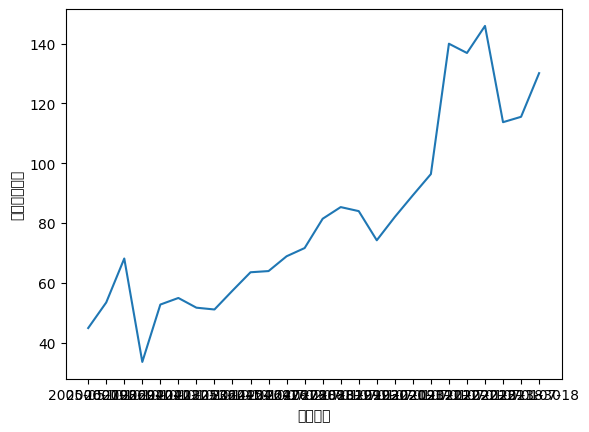

In [48]:
import matplotlib.pyplot as plt
plt.plot(df['資料日期'], df['除權息參考價'])
plt.xlabel('資料日期')
plt.ylabel('除權息參考價')
plt.show()

台灣國歷 94年01月11日 對應的西元日期為 2005-01-11


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import twstock
from datetime import datetime
import matplotlib.pyplot as plt

df = pd.read_csv('tw_train.csv')
df

# 創建空字典來存放交易次數
stock_counts = {}

# 使用 for 迴圈遍歷每一列資料，計算每個股票的交易次數
for index, row in df.iterrows():
    stock_code = row['股票代號']
    transaction_type = row['交易別']
    count = row['股數']
    date = row['交易日']
    cost = float(row['進帳/出帳'])
    
    # 将字符串转换为 datetime 对象
    # date_object = datetime.strptime(date, '%Y/%m/%d')
    # year = date_object.year
    # month = date_object.month
    # day = date_object.day

    # formatted_date_str = date_object.strftime('%Y-%m-%d')

    # 如果股票代碼為 NaN，略過這一列
    if pd.isna(stock_code) or pd.isna(count):
        continue

    # 如果股票代碼還不在字典中，創建一個新的鍵值對
    if stock_code not in stock_counts:
        stock_counts[stock_code] = {'庫存股': 0,'總成本':0}
    stock_counts[stock_code]['庫存股'] += count
    stock_counts[stock_code]['總成本'] += cost
    #stock_counts[stock_code]['名稱'] = twstock.Stock(stock_code).name

# 將結果轉換為 DataFrame 格式
#stock_counts_df = pd.DataFrame.from_dict(stock_counts)

# 使用 tabulate 函數將 DataFrame 轉換為表格

#print(df)

# 將字典轉換為列表形式

dict = {}
data = []
for stock_code, data_dict in stock_counts.items():
    stock = twstock.realtime.get(stock_code) 
    name = stock['info']['name']
    count = data_dict['庫存股']
    cost = -data_dict['總成本']
    val = stock['realtime']['latest_trade_price']
    valTotal = float(val) * float(count)
    gain = valTotal - cost
    gainPer = float(gain) / float(cost) * 100

    dict[stock_code] = { 'valTotal':valTotal}

    #格式化
    valTotal = '{:,}'.format(valTotal)
    cost= '{:,}'.format(cost)
    count = int(count)
    val = "{:.2f}".format(float(val))
    gain = '{:,}'.format(float(gain))
    gainPer = "{:.2f}".format(float(gainPer)) +'%'
    

    data.append([stock_code , name , count , val , valTotal , cost , gain , gainPer])
    #stock = twstock.Stock(stock_code)


# 使用 tabulate 函數將列表轉換為表格
headers = ['股票代碼', '股票名稱', '庫存股','股價','現值總價','總成本','未實現損益','未實現損益(%)']
df = pd.DataFrame(data, columns=headers)

pd.set_option('display.colheader_justify', 'left')  # 設置列標題左對齊
pd.set_option('display.width', 3000)  # 設置顯示寬度，防止換行
# 打印表格

styled_df = df.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }, {
        'selector': 'td',
        'props': [('text-align', 'left')]
    }]
)
styled_df

#stock = twstock.Stock('2330')
#price = stock.fetch(2020,2)
#print(price)

,股票代碼,股票名稱,庫存股,股價,現值總價,總成本,未實現損益,未實現損益(%)
0,0050,元大台灣50,0,167.25,0.0,-376.0,376.0,-100.00%
1,2330,台積電,0,835.00,0.0,"-3,004.0","3,004.0",-100.00%
2,2376,技嘉,100,322.50,"32,250.0","8,809.0","23,441.0",266.10%
3,006208,富邦台50,4150,97.80,"405,870.0","322,803.0","83,067.0",25.73%
4,2884,玉山金,0,29.00,0.0,-598.0,598.0,-100.00%
5,0056,元大高股息,0,39.51,0.0,346.0,-346.0,-100.00%
6,00679B,元大美債20年,0,29.24,0.0,-34.0,34.0,-100.00%
7,00646,元大S&P500,0,53.25,0.0,"-1,194.0","1,194.0",-100.00%
8,00631L,元大台灣50正2,480,213.35,"102,408.0","64,754.0","37,654.0",58.15%


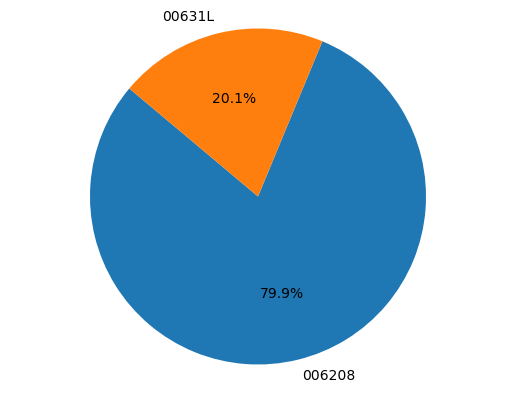

In [56]:

del dict['2376']#略過技嘉
labels = [key for key, value in dict.items() if value['valTotal'] != 0 and key]
totalVals = [value['valTotal'] for value in dict.values() if value['valTotal'] != 0]
#data
#labels
totalVals

# 指定中文字體
from matplotlib.font_manager import FontProperties
#font = FontProperties(fname='SimHei.ttf', size=14)

# 創建圓餅圖
plt.pie(totalVals, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 使圓餅圖為圓形
plt.title('', fontproperties='Arial')  # 使用中文字體
plt.show()
